In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [34]:
import numpy as np
dataset = np.array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])
print(dataset.shape)

(25, 4)


In [35]:
x_data = dataset[:, 0:-1]
y_data = dataset[:, [-1]]

print(x_data.shape)
print(y_data.shape)

(25, 3)
(25, 1)


PyTorch는 `torch.utils.data.Dataset`으로 Custom Dataset을 만들고, `torch.utils.data.DataLoader`로 데이터를 불러옵니다.

하지만 하다보면 데이터셋에 어떤 설정을 주고 싶고, 이를 조정하는 파라미터가 꽤 있다는 걸 알 수 있습니다. 그래서 이번에는 torch의 `DataLoader`의 몇 가지 기능을 살펴보겠습니다.

# **DataLoader Parameters**

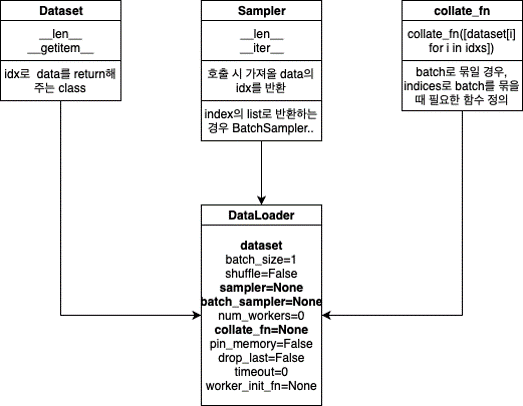

출처: https://hulk89.github.io/pytorch/2019/09/30/pytorch_dataset/

In [36]:
class CustomDataset(Dataset):
# torch.utils.data.Dataset 상속
    def __init__(self, x_data, y_data):
        self.x_train = x_data
        self.y_train = y_data

    def __len__(self):
    # 이 데이터셋의 총 데이터 수
        return len(self.x_train)

    def __getitem__(self, idx):
    # 어떠한 인덱스(idx)를 받았을 때, 그에 상응하는 입출력 데이터 반환
        x = torch.FloatTensor(self.x_train[idx])
        y = torch.FloatTensor(self.y_train[idx])
        return x, y

In [37]:
dataset = CustomDataset(x_data, y_data)

In [38]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True,)

In [39]:
dataiter = iter(dataloader)
x_torch_data, y_torch_data = dataiter.next()
print(x_torch_data)
print(y_torch_data)

tensor([[79., 80., 73.],
        [73., 80., 75.]])
tensor([[152.],
        [152.]])


**dataset**

* *Dataset*

`torch.utils.data.Dataset`의 객체를 사용해야 합니다.

참고로 torch의 `dataset`은 2가지 스타일이 있습니다.

*   **Map-style dataset**

 > index가 존재하여 data[index]로 데이터를 참조할 수 있음
 
 > __getitem__과 __len__ 선언 필요

*   **Iterable-style dataset**

 > random으로 읽기에 어렵거나, data에 따라 batch size가 달라지는 데이터(dynamic batch size)에 적합
 
 > 비교하자면 stream data, real-time log 등에 적합

 > __iter__ 선언 필요

이 점을 유의하며 아래의 파라미터 설명을 읽으면 더 이해가 쉽습니다.


**batch_size**

*   *int, optional, default=1*

배치(batch)의 크기입니다. 데이터셋에 50개의 데이터가 있고, `batch_size`가 10라면 총 50/10=5, 즉 5번의 iteration만 지나면 모든 데이터를 볼 수 있습니다.

이 경우 반복문을 돌리면 `(batch_size, *(data.shape))`의 형태의 `Tensor`로 데이터가 반환됩니다. dataset에서 return하는 모든 데이터는 Tensor로 변환되어 오니 Tensor로 변환이 안되는 데이터는 에러가 납니다.


**shuffle**

*   *bool, optional, default=False*

데이터를 DataLoader에서 섞어서 사용하겠는지를 설정할 수 있습니다. 실험 재현을 위해 `torch.manual_seed`를 고정하는 것도 포인트입니다.

 > 그냥 Dataset에서 initialize할 때, random.shuffle로 섞을 수도 있습니다.


**sampler**

*   *Sampler, optional*

`torch.utils.data.Sampler` 객체를 사용합니다.

sampler는 index를 컨트롤하는 방법입니다. 데이터의 index를 원하는 방식대로 조정합니다. 즉 index를 컨트롤하기 때문에 설정하고 싶다면 `shuffle` 파라미터는 `False(기본값)`여야 합니다.

map-style에서 컨트롤하기 위해 사용하며 `__len__`과 `__iter__`를 구현하면 됩니다. 그 외의 미리 선언된 Sampler는 다음과 같습니다.

*   `SequentialSampler` : 항상 같은 순서
*   `RandomSampler` : 랜덤, replacemetn 여부 선택 가능, 개수 선택 가능
*   `SubsetRandomSampler` : 랜덤 리스트, 위와 두 조건 불가능
*   `WeigthRandomSampler` : 가중치에 따른 확률
*   `BatchSampler` : batch단위로 sampling 가능
*   `DistributedSampler` : 분산처리 (`torch.nn.parallel.DistributedDataParallel`과 함께 사용)


**batch_sampler**

*   *Sampler, optional*

위와 거의 동일합니다.

**num_workers**

*   *int, optional, default=0*

데이터 로딩에 사용하는 subprocess개수입니다. (멀티프로세싱)

기본값이 0인데 이는 data가 main process로 불러오는 것을 의미합니다. 그럼 많이 사용하면 좋지 않은가? 라고 질문하실 수도 있습니다.

하지만 데이터를 불러 CPU와 GPU 사이에서 많은 교류가 일어나면 오히려 병목이 생길 수 있습니다. 이것도 trade-off 관계입니다.

**collate_fn**

*   *callable, optional*

map-style 데이터셋에서 sample list를 batch 단위로 바꾸기 위해 필요한 기능입니다. zero-padding이나 Variable Size 데이터 등 데이터 사이즈를 맞추기 위해 많이 사용합니다.

**pin_memory**

*   *bool, optional*

`True`로 선언하면, 데이터로더는 Tensor를 CUDA 고정 메모리에 올립니다.

**drop_last**

*   *bool, optional*

`batch` 단위로 데이터를 불러온다면, batch_size에 따라 마지막 batch의 길이가 달라질 수 있습니다. 예를 들어 data의 개수는 27개인데, batch_size가 5라면 마지막 batch의 크기는 2가 되겠죠.

batch의 길이가 다른 경우에 따라 loss를 구하기 귀찮은 경우가 생기고, batch의 크기에 따른 의존도 높은 함수를 사용할 때 걱정이 되는 경우 마지막 batch를 사용하지 않을 수 있습니다.

**time_out**

*   *numeric, optional, default=0*

양수로 주어지는 경우, DataLoader가 data를 불러오는데 필요한 제한시간입니다.

**worker_init_fn**

*   *callable, optional, default='None'*

num_worker가 개수라면, 이 파라미터는 어떤 worker를 불러올 것인가를 리스트로 전달합니다.

# **Dataset**

In [27]:
class MapDataset(Dataset):
    def __len__(self):
        return 10
    
    def __getitem__(self, idx):
        return {"input":torch.tensor([idx, 2*idx, 3*idx], 
                                     dtype=torch.float32), 
                "label": torch.tensor(idx, 
                                      dtype=torch.float32)}

map_dataset = MapDataset()

*   input: [0, 0, 0], [1, 2, 3], [2, 4, 6], ...
*   label: [0, 1, 2, 3, ...]

# **Dataloader를 사용해서 뽑아보기**

`dataset`으로 유의미한 data를 뽑아오기 위한 것이 `DataLoader`이다. 순서를 그대로 지키는 것을 알 수 있다. 기본 옵션은 다음과 같다.

```
DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None)
```

In [41]:
map_dataloader = DataLoader(map_dataset)
for data in map_dataloader:
    print(data['input'], data['label'])

tensor([[0., 0., 0.]]) tensor([0.])
tensor([[1., 2., 3.]]) tensor([1.])
tensor([[2., 4., 6.]]) tensor([2.])
tensor([[3., 6., 9.]]) tensor([3.])
tensor([[ 4.,  8., 12.]]) tensor([4.])
tensor([[ 5., 10., 15.]]) tensor([5.])
tensor([[ 6., 12., 18.]]) tensor([6.])
tensor([[ 7., 14., 21.]]) tensor([7.])
tensor([[ 8., 16., 24.]]) tensor([8.])
tensor([[ 9., 18., 27.]]) tensor([9.])


batch_size를 주면 batch로 뽑을 수 있다. 물론 이번에도 순서대로 batching을 한다.

In [29]:
map_dataloader = DataLoader(map_dataset, batch_size=4)
for data in map_dataloader:
    print(data['input'].shape, data['label'])

torch.Size([4, 3]) tensor([0., 1., 2., 3.])
torch.Size([4, 3]) tensor([4., 5., 6., 7.])
torch.Size([2, 3]) tensor([8., 9.])


# **Sampler**

dataset은 index로 data를 가져오도록 설계되었기 때문에, shuffle을 하기 위해서 index를 적절히 섞어주면 된다. 그 것을 구현한 것이 `Sampler`이다.

> 매 step마다 다음 index를 yield하면 됨.

> __len__과 __iter__를 구현하면 된다.

RandomSampler로 각 data를 random하게 가져오며, batch_size를 4로 해보았다.

In [30]:
point_sampler = RandomSampler(map_dataset)
map_dataloader = DataLoader(map_dataset, batch_size=4, sampler=point_sampler)
for data in map_dataloader:
    print(data['input'].shape, data['label'])

torch.Size([4, 3]) tensor([7., 6., 9., 0.])
torch.Size([4, 3]) tensor([3., 5., 8., 2.])
torch.Size([2, 3]) tensor([1., 4.])


# **batch_sampler**

batch 단위로 sampling할 때 쓴다. bucketing할 때 외에는 언제 쓸까...

* 매 step마다 `index`의 `list`를 반환하면 batch_sampler로 쓸 수 있음
* `def __init__(self, sampler, batch_size, drop_last)` 형식으로 많이 사용

In [40]:
point_sampler = RandomSampler(map_dataset)
batch_sampler = BatchSampler(point_sampler, 3, False)
map_dataloader = DataLoader(map_dataset, batch_sampler=batch_sampler)
for data in map_dataloader:
    print(data['input'].shape, data['label'])

torch.Size([3, 3]) tensor([5., 9., 2.])
torch.Size([3, 3]) tensor([7., 6., 3.])
torch.Size([3, 3]) tensor([0., 4., 1.])
torch.Size([1, 3]) tensor([8.])


# **collate_fn**

*   batch_sampler로 묶인 이후에는, collate_fn을 호출해서 batch로 묶는다.
 > `collate_fn([dataset[i] for i in indices])`

*   dataset이 variable length면 바로 못 묶이고 에러가 나므로, collate_fn을 만들어서 넘겨줘야함

***이제 input의 size가 data마다 다른 dataset을 만들어보자.***

In [42]:
class VarMapDataset(Dataset):
    def __len__(self):
        return 10
    
    def __getitem__(self, idx):
        return {"input":torch.tensor([idx] * (idx+1), 
                                     dtype=torch.float32), 
                "label": torch.tensor(idx, 
                                      dtype=torch.float32)}

var_map_dataset = VarMapDataset()

In [61]:
var_map_dataloader = DataLoader(var_map_dataset)
for data in var_map_dataloader:
    print("{}, {}".format(data['input'], data['label']))

tensor([[0.]]), tensor([0.])
tensor([[1., 1.]]), tensor([1.])
tensor([[2., 2., 2.]]), tensor([2.])
tensor([[3., 3., 3., 3.]]), tensor([3.])
tensor([[4., 4., 4., 4., 4.]]), tensor([4.])
tensor([[5., 5., 5., 5., 5., 5.]]), tensor([5.])
tensor([[6., 6., 6., 6., 6., 6., 6.]]), tensor([6.])
tensor([[7., 7., 7., 7., 7., 7., 7., 7.]]), tensor([7.])
tensor([[8., 8., 8., 8., 8., 8., 8., 8., 8.]]), tensor([8.])
tensor([[9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]]), tensor([9.])


위의 dataset을 이용하여 batch_size를 2 이상으로 DataLoader를 부르면 error가 난다.

In [62]:
var_map_dataloader = DataLoader(var_map_dataset, batch_size=2)
for data in var_map_dataloader:
    print(data['input'].shape, data['label'])

RuntimeError: ignored

따라서 batch로 묶일 모든 데이터를 잘 묶어주는(collate) 함수가 필요한 것!

In [63]:
def make_batch(samples):
    inputs = [sample['input'] for sample in samples]
    labels = [sample['label'] for sample in samples]
    padded_inputs = torch.nn.utils.rnn.pad_sequence(inputs, batch_first=True)
    return {'input': padded_inputs.contiguous(),
            'label': torch.stack(labels).contiguous()}
    
var_map_dataloader = DataLoader(var_map_dataset, batch_size=3, collate_fn=make_batch)
for data in var_map_dataloader:
    print(data['input'], data['label'])

tensor([[0., 0., 0.],
        [1., 1., 0.],
        [2., 2., 2.]]) tensor([0., 1., 2.])
tensor([[3., 3., 3., 3., 0., 0.],
        [4., 4., 4., 4., 4., 0.],
        [5., 5., 5., 5., 5., 5.]]) tensor([3., 4., 5.])
tensor([[6., 6., 6., 6., 6., 6., 6., 0., 0.],
        [7., 7., 7., 7., 7., 7., 7., 7., 0.],
        [8., 8., 8., 8., 8., 8., 8., 8., 8.]]) tensor([6., 7., 8.])
tensor([[9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]]) tensor([9.])


Sampler를 추가하면

In [64]:
sampler = RandomSampler(var_map_dataset)
var_map_dataloader = DataLoader(var_map_dataset, batch_size=3, sampler=sampler, collate_fn=make_batch)
for data in var_map_dataloader:
    print(data['input'], data['label'])

tensor([[5., 5., 5., 5., 5., 5., 0., 0.],
        [3., 3., 3., 3., 0., 0., 0., 0.],
        [7., 7., 7., 7., 7., 7., 7., 7.]]) tensor([5., 3., 7.])
tensor([[2., 2., 2., 0., 0., 0., 0.],
        [6., 6., 6., 6., 6., 6., 6.],
        [4., 4., 4., 4., 4., 0., 0.]]) tensor([2., 6., 4.])
tensor([[9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [8., 8., 8., 8., 8., 8., 8., 8., 8., 0.]]) tensor([9., 1., 8.])
tensor([[0.]]) tensor([0.])
